In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [17]:
data = pd.read_csv('heart.csv').dropna()
data_pd = data.copy()

In [18]:
data1 = data[['age', 'trestbps', 'thalach']]
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [19]:
data2 = data[['age', 'trestbps', 'thalach', 'cp', 'chol', 'oldpeak']]
data2

,age,trestbps,thalach,cp,chol,oldpeak
0,63,145,150,3,233,2.3
1,37,130,187,2,250,3.5
2,41,130,172,1,204,1.4
3,56,120,178,1,236,0.8
4,57,120,163,0,354,0.6
...,...,...,...,...,...,...
298,57,140,123,0,241,0.2
299,45,110,132,3,264,1.2
300,68,144,141,0,193,3.4
301,57,130,115,0,131,1.2


Prior 1 - age

In [20]:
np.random.seed(42)
ages = np.random.normal(50, 10, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.1 * (ages - 70))))

data = {
    'N': len(ages),
    'age': list(ages),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior1.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=False,
                        seed=24252)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |█▍        | 00:00 Iteration:    1 / 1200 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


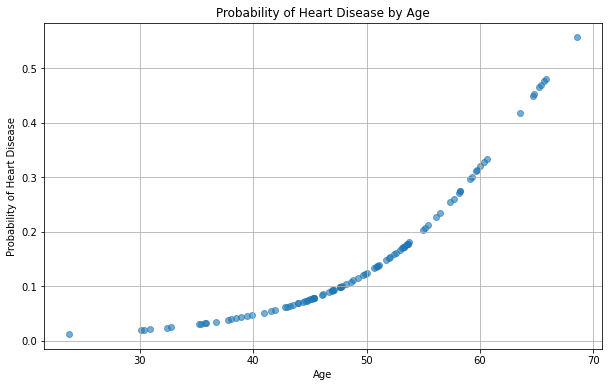

In [21]:
prior1 = sim.draws_pd()

results_df = pd.DataFrame({
    'age': data['age'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0) # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['age'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease by Age')
plt.grid(True)
plt.show()

Prior 2 - trestbps (resting blood pressure)

In [22]:
np.random.seed(42)
bps = np.random.uniform(90, 180, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.05 * (bps - 120))))

data = {
    'N': len(bps),
    'bps': list(bps),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior2.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=True,
                        seed=242522,)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [23]:
sim.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
alpha,-0.16,0.630,0.9,-1.7,0.33,0.45,2.0,32.0,1.500000e+15
beta,-0.24,0.820,1.2,-1.7,0.54,1.20,2.0,32.0,1.600000e+15
heart_disease_prob[1],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6349.0,1.424016e+69
heart_disease_prob[2],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6349.0,1.089371e+92
...,...,...,...,...,...,...,...,...,...
heart_disease_prob[96],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6349.0,5.649158e+73
heart_disease_prob[97],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6349.0,4.809250e+74
heart_disease_prob[98],0.50,0.025,0.5,0.0,1.00,1.00,400.0,6349.0,1.558062e+71


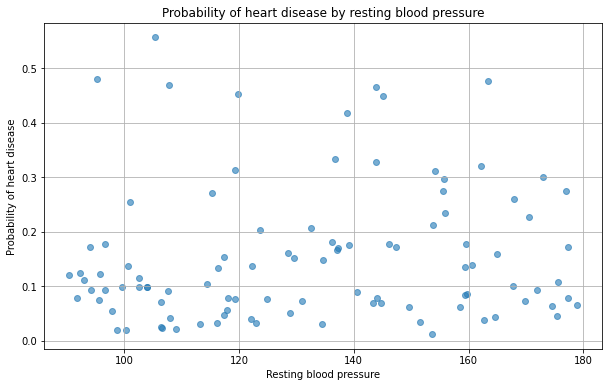

In [24]:
prior2 = sim.draws_pd()

results_df = pd.DataFrame({
    'bps': data['bps'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0)
})

plt.figure(figsize=(10, 6))
plt.scatter(results_df['bps'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Resting blood pressure')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by resting blood pressure')
plt.grid(True)
plt.show()

Prior 3 - thalach (maximum heart rate achieved)

In [25]:
np.random.seed(42)
thalach = np.random.uniform(70, 190, 100)
heart_disease = np.random.binomial(1, 1 / (1 + np.exp(-0.05 * (thalach - 120))))

data = {
    'N': len(bps),
    'thalach': list(thalach),
    'heart_disease': list(heart_disease)
}

model_age = CmdStanModel(stan_file='prior3.stan')
sim = model_age.sample(data=data,
                        iter_sampling=200,
                        iter_warmup=1000,
                        chains=4,
                        fixed_param=True,
                        seed=242522,)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


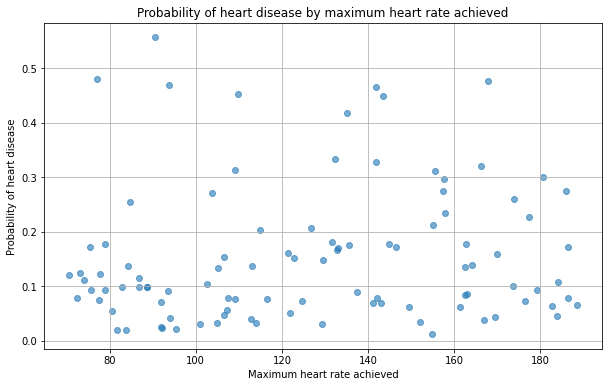

In [26]:
prior3 = sim.draws_pd()

results_df = pd.DataFrame({
    'thalach': data['thalach'],
    'heart_disease_prob': prior1.iloc[:, 9:].mean(axis=0)  # Mean probability across samples
})

# Plotting the results with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(results_df['thalach'], results_df['heart_disease_prob'], alpha=0.6)
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease by maximum heart rate achieved')
plt.grid(True)
plt.show()

## Posterior

In [70]:
target = data['target']
data1

,age,trestbps,thalach
0,63,145,150
1,37,130,187
2,41,130,172
3,56,120,178
4,57,120,163
...,...,...,...
298,57,140,123
299,45,110,132
300,68,144,141
301,57,130,115


In [75]:
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(data1)

In [77]:
stan_data = {
    'N': predictors.shape[0],
    'K': predictors.shape[1],
    'X': predictors_scaled,
    'y': target.values
}

model = cmdstanpy.CmdStanModel(stan_file='posterior1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)


chain 1 |█▉        | 00:00 Iteration:  400 / 3000 [ 13%]  (Warmup)


chain 1 |███▍      | 00:00 Iteration:  900 / 3000 [ 30%]  (Warmup)


chain 1 |████▋     | 00:00 Iteration: 1200 / 3000 [ 40%]  (Sampling)


chain 1 |█████▉    | 00:00 Iteration: 1600 / 3000 [ 53%]  (Sampling)


chain 1 |███████▏  | 00:00 Iteration: 2000 / 3000 [ 66%]  (Sampling)


chain 1 |████████▍ | 00:00 Iteration: 2400 / 3000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


/usr/local/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted probability of heart disease: 0.68


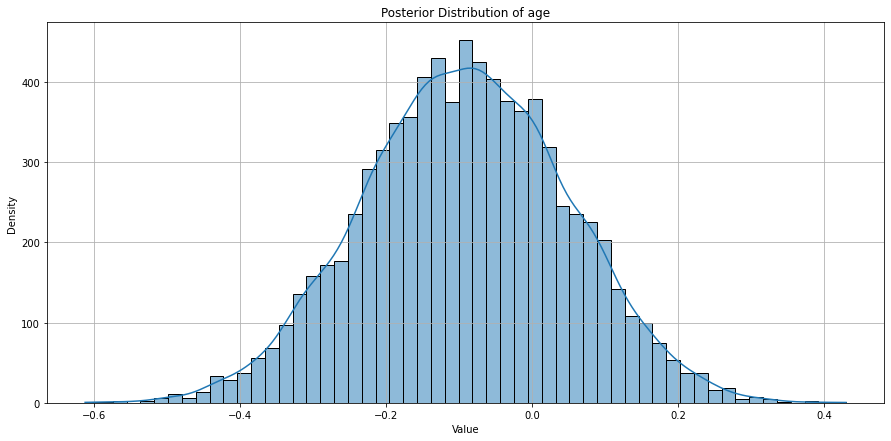

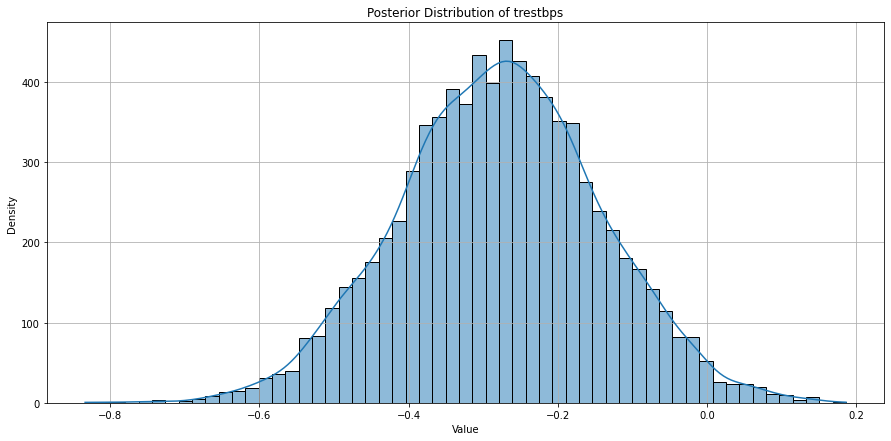

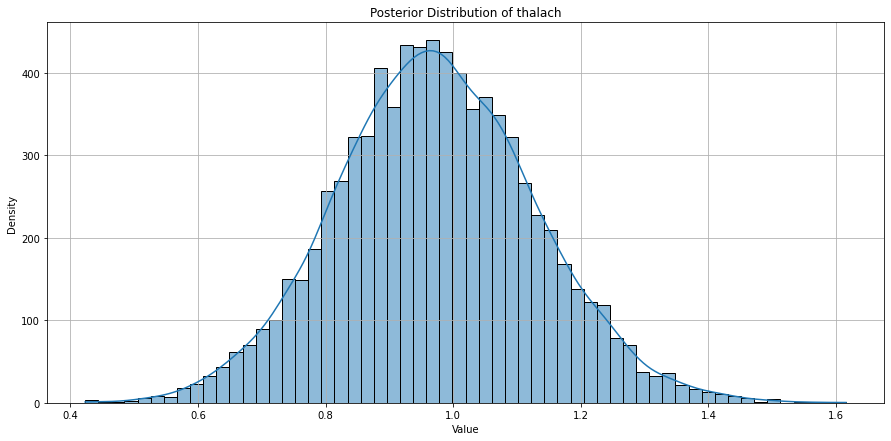

In [79]:

fit = model.sample(data=stan_data, iter_sampling=2000, chains=4)

results = fit.draws_pd()

feature_names = ['age', 'trestbps', 'thalach']
param_names = [f'beta[{i+1}]' for i in range(len(feature_names))]
param_mapping = dict(zip(param_names, feature_names))

beta_columns = [col for col in results.columns if col in param_mapping]

beta_samples = results[beta_columns].values

new_data = np.array([60, 140, 172])  # example new data point
new_data_scaled = scaler.transform([new_data])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Predictive probabilities from posterior samples
pred_probs = sigmoid(np.dot(beta_samples, new_data_scaled.T))

# Aggregate predictions
predicted_prob = np.mean(pred_probs)
print(f'Predicted probability of heart disease: {predicted_prob:.2f}')

# Plot the posterior distributions in separate figures
for column in beta_columns:
    plt.figure(figsize=(15,7))
    sns.histplot(results[column], kde=True)
    param_name = param_mapping[column]
    plt.title(f'Posterior Distribution of {param_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

In [57]:
# Sample from the posterior distribution of the age coefficient
beta_age_samples = results['beta[1]'].values  # Assuming 'beta[1]' corresponds to 'age'

# New data example: age = 60
new_age = 82

# Calculate the linear predictor (log-odds) for each sample
log_odds = beta_age_samples * new_age

# Convert log-odds to probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probabilities = sigmoid(log_odds)

# Aggregate the probabilities
predicted_prob = np.mean(probabilities)
print(f'Predicted probability of heart disease for age 60: {predicted_prob:.2f}')


Predicted probability of heart disease for age 60: 0.26


In [64]:
# Sample from the posterior distribution of the trestbps coefficient
beta_trestbps_samples = results['beta[2]'].values  # Assuming 'beta[2]' corresponds to 'trestbps'

# New data example: trestbps = 140
new_trestbps = 140

# Calculate the linear predictor (log-odds) for each sample
log_odds = beta_trestbps_samples * new_trestbps

# Convert log-odds to probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probabilities = sigmoid(log_odds)

# Aggregate the probabilities
predicted_prob = np.mean(probabilities)
print(f'Predicted probability of heart disease for trestbps 140: {predicted_prob:.2f}')


Predicted probability of heart disease for trestbps 140: 0.02
